### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [54]:
data = pd.read_csv('coupons.csv')

In [55]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [56]:
#Missing data
nullData = data.isnull()
print(nullData)

       destination  passanger  weather  temperature   time  coupon  \
0            False      False    False        False  False   False   
1            False      False    False        False  False   False   
2            False      False    False        False  False   False   
3            False      False    False        False  False   False   
4            False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0           False   False  False          False  ...        False       True   

3. Decide what to do about your missing data -- drop, replace, other...

In [57]:
#Dropped missing data
dropData = nullData.dropna()

4. What proportion of the total observations chose to accept the coupon?



In [58]:
#Total population
total = data['Y'].count()

#Drivers who accepted the coupon
acceptedTotal = data.loc[data['Y'] == 1].shape[0]
print(acceptedTotal/total)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Coupon For Customer'}, xlabel='Coupon', ylabel='Count'>

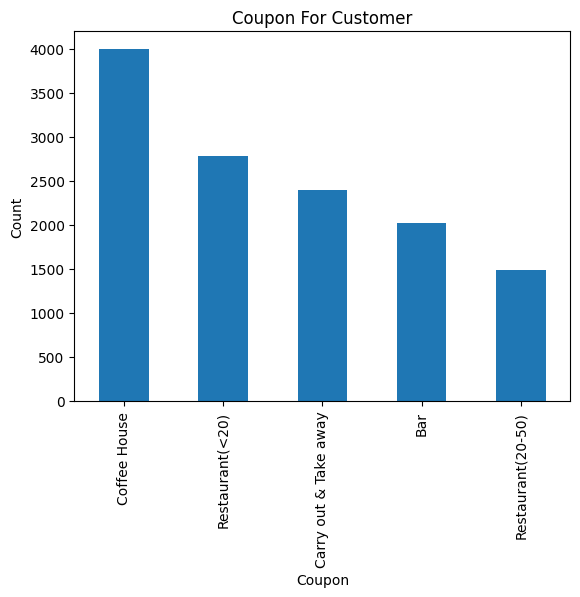

In [79]:
data['coupon'].value_counts().plot(kind='bar', title="Coupon For Customer", xlabel="Coupon", ylabel="Count")


6. Use a histogram to visualize the temperature column.

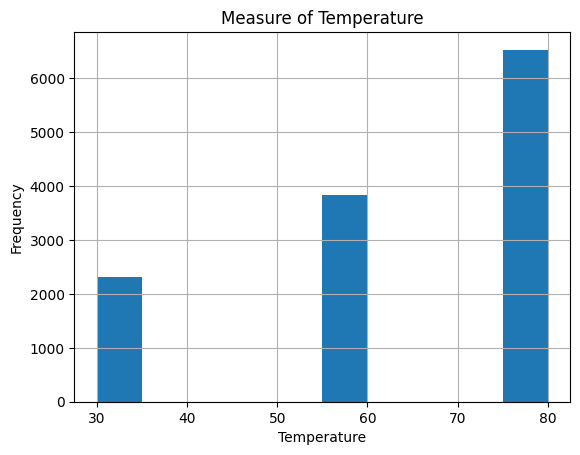

In [80]:
hist = data['temperature'].hist()
plt.title('Measure of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
# Display the histogram
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [61]:
#DataFrame for bar coupons.
couponsBar = data[data['coupon'] == 'Bar']
print(couponsBar)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [70]:
#Acceptance rate of drivers who accepted the coupons for bar
acceptedBarCoupons = (couponsBar['Y'] == 1).mean()

print(acceptedBarCoupons)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [75]:
#Acceptance rate of drivers who went to a bar 3 or less times in a month who accepted the coupons
acceptanceRateBarVisitOneToThree = (couponsBar[(couponsBar.Bar == '1~3') | (couponsBar.Bar == 'less1') | (couponsBar.Bar == 'never')]['Y'] == 1).mean()



#Acceptance rate of drivers who went to a bar more than 3 times in a month who accepted the coupons
acceptanceRateBarVisitMoreThanFour = (couponsBar[(couponsBar.Bar == '4~8') | (couponsBar.Bar == 'gt8')]['Y'] == 1).mean()


print(acceptanceRateBarVisitOneToThree, acceptanceRateBarVisitMoreThanFour)

0.37061769616026713 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [76]:
#Acceptance rate of drivers who go to bar more than 1 and are over the age of 25.
acceptanceRateBarVisitMoreThanOnceAndOver25 = (couponsBar[((couponsBar.Bar == '1~3') | (couponsBar.Bar == '4~8') | (couponsBar.Bar == 'gt8')) & (couponsBar.age > '25')]['Y'] == 1).mean()


print(acceptanceRateBarVisitMoreThanOnceAndOver25, acceptedBarCoupons) #Yes there is difference between drivers who goes to bar more than once and all others


0.6883720930232559 0.41001487357461575


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [77]:
#Acceptance rate of drivers who goes to bar more than once and had passengers that were not kid and occupation other than farming, fishing or forestry.

acceptanceRateMoreThanFourBarVisitPassangersNotKid = (couponsBar[((couponsBar.Bar == '1~3') | (couponsBar.Bar == '4~8') | (couponsBar.Bar == 'gt8')) & (couponsBar.passanger != ('Alone', 'Kid(s)')) & (couponsBar.occupation != ('farming', 'fishing', 'forestry'))]['Y'] == 1).mean()


print(acceptanceRateMoreThanFourBarVisitPassangersNotKid, acceptedBarCoupons)

0.6879194630872483 0.41001487357461575


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [78]:
#Acceptance rate of drivers who goes to bar more than once a month and had passengers that were not a kid, and were not widowed
acceptanceMoreThanOnceBarVisitPassangersNotKidNotWidowed = (couponsBar[((couponsBar.Bar == '1~3') | (couponsBar.Bar == '4~8') | (couponsBar.Bar == 'gt8')) & (couponsBar.passanger != ('Alone', 'Kid(s)')) & (couponsBar.maritalStatus != ('widowed'))]['Y'] == 1).mean()


#Acceptance rate of drivers who goes to bar more than once a month and are under the age 30.
acceptanceMoreThanOnceBarVisitAndUnder30 = (couponsBar[((couponsBar.Bar == '1~3') | (couponsBar.Bar == '4~8') | (couponsBar.Bar == 'gt8')) & (couponsBar.age < '30')].Y == 1).mean()

#Acceptance rate of drivers who goes to cheap restaurants more than 4 times a month and income is less than 50K
acceptanceCheapRestaurantMoreThanFourTimesIncomeLessThan50 = (couponsBar[((couponsBar.RestaurantLessThan20 == '4~8') | (couponsBar.RestaurantLessThan20 == 'gt8')) & (couponsBar.income < '50000')]['Y'] == 1).mean()



print(acceptanceMoreThanOnceBarVisitPassangersNotKidNotWidowed, acceptanceMoreThanOnceBarVisitAndUnder30, acceptanceCheapRestaurantMoreThanFourTimesIncomeLessThan50)

0.6879194630872483 0.7313432835820896 0.4331864904552129


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Close to half of the drivers who get the coupon accept it
When comparing those who went to bar 3 or fewer times to those who went more those who went more accept more coupons
Those who went to bar more than onces and are over the age of 25 has 68.8%
Those who went to bar more than once a month and had passengers that were not kid and had occupations other than farming, fishing, or forestry had 68.8%

Those who go to bars more than once a month, had passengers that were not a kid, and were not widowed had 68.8%, but those who go to bars more than once a month and are under the age of 30 had 73%
acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K had 43%




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
couponsCoffeeHouse = data[data['coupon'] == 'Coffee House']
driveresWithPassangersCoffeeHouse = couponsCoffeeHouse[couponsCoffeeHouse.passanger != 'Alone']
print(driveresWithPassangersCoffeeHouse)

           destination  passanger weather  temperature  time        coupon  \
1      No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
3      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4      No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
12     No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
23     No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
...                ...        ...     ...          ...   ...           ...   
10708  No Urgent Place     Kid(s)   Sunny           80   2PM  Coffee House   
10724  No Urgent Place  Friend(s)   Sunny           80  10PM  Coffee House   
10741  No Urgent Place  Friend(s)   Sunny           80  10PM  Coffee House   
10755  No Urgent Place  Friend(s)   Sunny           80  10PM  Coffee House   
10769             Home    Partner   Rainy           55   6PM  Coffee House   

      expiration  gender age      maritalStatus  ...  CoffeeHou